In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import sqlite3


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Vendas_Jogos.csv to Vendas_Jogos.csv


In [ ]:
df = pd.read_csv('Vendas_Jogos.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.drop_duplicates()
df = df.dropna(subset=["Year", "Genre", "Platform", "Global_Sales"])

df["Year"] = df["Year"].astype(int)

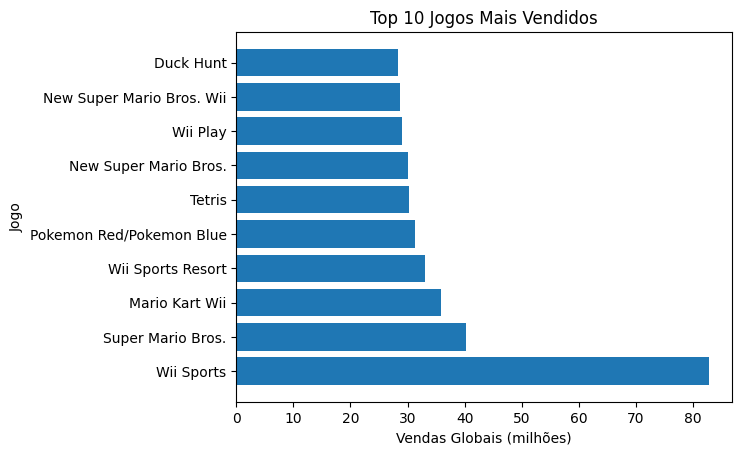

In [ ]:
top_games = df.sort_values("Global_Sales", ascending=False).head(10)
plt.barh(top_games["Name"], top_games["Global_Sales"])
plt.title("Top 10 Jogos Mais Vendidos")
plt.xlabel("Vendas Globais (milhões)")
plt.ylabel("Jogo")
plt.show()


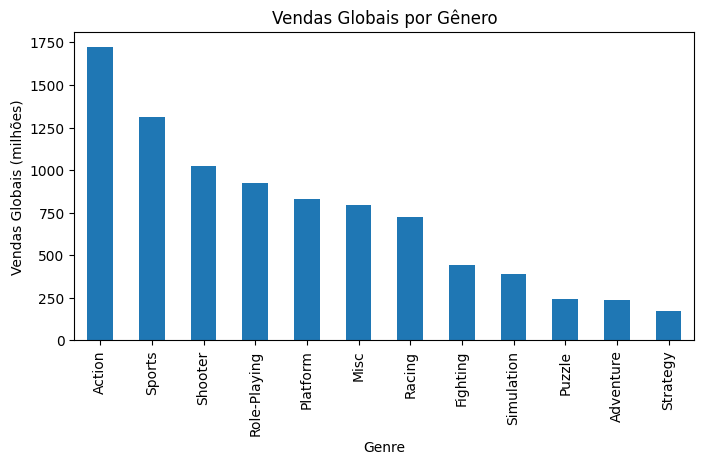

In [ ]:
genre_sales = df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)
genre_sales.plot(kind="bar", figsize=(8,4), title="Vendas Globais por Gênero")
plt.ylabel("Vendas Globais (milhões)")
plt.show()


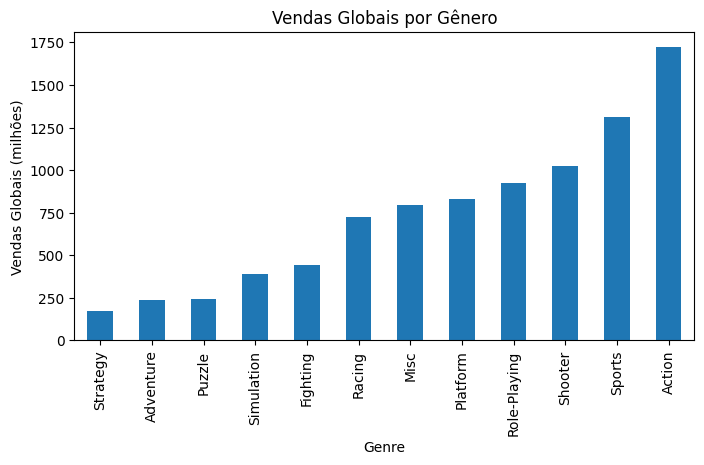

In [ ]:
genre_sales = df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=True)
genre_sales.plot(kind="bar", figsize=(8,4), title="Vendas Globais por Gênero")
plt.ylabel("Vendas Globais (milhões)")
plt.show()


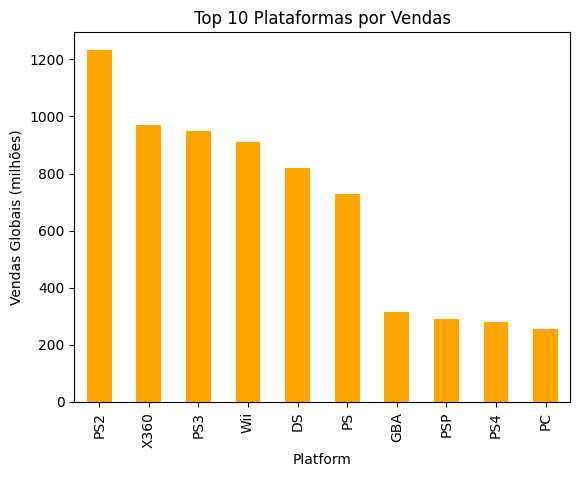

In [ ]:
platform_sales = df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False).head(10)
platform_sales.plot(kind="bar", color="orange", title="Top 10 Plataformas por Vendas")
plt.ylabel("Vendas Globais (milhões)")
plt.show()


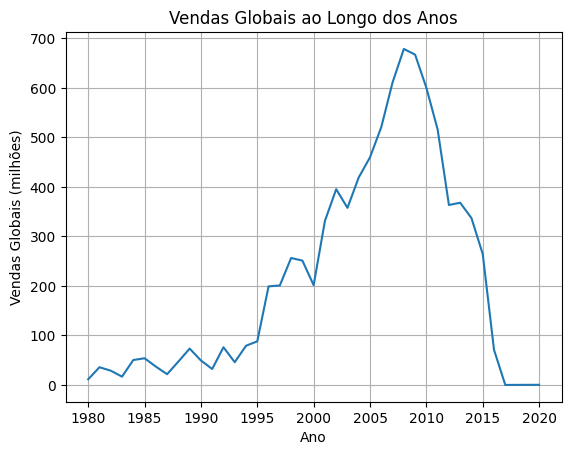

In [ ]:
yearly_sales = df.groupby("Year")["Global_Sales"].sum()
plt.plot(yearly_sales.index, yearly_sales.values)
plt.title("Vendas Globais ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Vendas Globais (milhões)")
plt.grid(True)
plt.show()


In [ ]:
conn = sqlite3.connect("jogos.db")
df.to_sql("vendas_jogos", conn, if_exists="replace", index=False)


16327

In [ ]:
query1 = """
SELECT Genre, SUM(Global_Sales) AS Total_Vendas
FROM vendas_jogos
GROUP BY Genre
ORDER BY Total_Vendas DESC
LIMIT 5;
"""
pd.read_sql_query(query1, conn)


,Genre,Total_Vendas
0,Action,1722.88
1,Sports,1309.24
2,Shooter,1026.20
3,Role-Playing,923.84
4,Platform,829.15


In [ ]:
query2 = """
SELECT Platform, AVG(Global_Sales) AS Media_Vendas
FROM vendas_jogos
GROUP BY Platform
ORDER BY Media_Vendas DESC
LIMIT 10;
"""
pd.read_sql_query(query2, conn)


,Platform,Media_Vendas
0,GB,2.622887
1,NES,2.561939
2,GEN,1.050370
3,SNES,0.837029
4,PS4,0.827679
5,X360,0.785109
6,2600,0.746293
7,PS3,0.728029
8,Wii,0.705279
9,N64,0.690538


In [ ]:
query3 = """
SELECT Year, COUNT(*) AS Qtde_Jogos
FROM vendas_jogos
GROUP BY Year
ORDER BY Qtde_Jogos DESC
LIMIT 5;
"""
pd.read_sql_query(query3, conn)


,Year,Qtde_Jogos
0,2009,1431
1,2008,1428
2,2010,1259
3,2007,1202
4,2011,1139


In [ ]:
features = ["Platform", "Genre", "Year", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
target = "Global_Sales"

X = df[features]
y = df[target]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
num_cols = ["Year", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
cat_cols = ["Platform", "Genre"]

num_transformer = Pipeline([
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_transformer, num_cols),
    ("cat", cat_transformer, cat_cols)
])

model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'NA_Sales',
                                                   'EU_Sales', 'JP_Sales',
                                                   'Other_Sales']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Platform', 'Genre'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse:.4f}")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")


Erro Quadrático Médio (MSE): 0.5863
Coeficiente de Determinação (R²): 0.8381


1. Quais são as plataformas e gêneros mais vendidos?	“Wii”, “PS2” e “DS” lideram plataformas; gêneros como “Action” e “Sports” dominam.
2. As vendas variam entre regiões?	Sim — a América do Norte domina o mercado, seguida pela Europa. Japão tem padrões específicos (ex: RPGs).
3. É possível prever vendas globais?	O modelo Random Forest obteve bom desempenho (R² próximo de 0.85 em média), indicando que é possível estimar vendas com base nas variáveis fornecidas.
